# WeatherPy
----

### Observations:

    1. According to Latitude vs Temperature scatter plot, we can observe that the cities that are far away from the equator are very cold. In fact, in most of the cases, the temperature of cities that have the latitude of 60+ is between 20 to 40 F. Similarly, most of the cities that of the latitude of -40 or less have the maximum temperature of 60 F or less. In addition, the bell curve shape can be easily seen which suggest the normal distribution between the Latitude vs Temperature data.

    2. According to Latitude vs Humidity scatter plot, it seems that there is no relation between latitude of the cities and their humidity. Most cities have more than 60% humidity.
    
    3. According to Latitude vs Cloudiness scatter plot, again there is no corolation between the location of the city from the equator with the cloudiness of the city.
    
    4. According to Latitude vs Wind Speed scatter plot, wind speed in most of the cities is less than 15 mph.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
# Base url and Specifying units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Number of random cities that was generated in the previous cell
N = len(cities)

# Creating empthy lists
citylat = [0]*N
citylng = [0]*N
maxtemp = [0]*N
humidity = [0]*N
cloud = [0]*N
windspeed = [0]*N
country = ["country"]*N
datetime = [0]*N

# Printing the header for print log
print("Beginning Data Retrieval")
print("------------------------")

# For loop that loop through every city in the cities list
for i in range(len(cities)):
    
    # There are some cities that we can't get the results using the openweathermap API. So we have to skip them.
    try:
        city = cities[i]
        
        # Print Log
        print(f"Processing Record {i+1} | {cities[i]}")

        # Build query URL and request your results in Celsius
        query_url = f"{url}appid={api_key}&q={city}&units={units}"

        # Get weather data
        weather = requests.get(query_url).json()

        # Filling the lists with correct values from openweathermap API
        citylat[i] = weather["coord"]["lat"]
        citylng[i] = weather["coord"]["lon"]
        maxtemp[i] = weather["main"]["temp_max"]
        humidity[i] = weather["main"]["humidity"]
        cloud[i] = weather["clouds"]["all"]
        windspeed[i] = weather["wind"]["speed"]
        country[i] = weather["sys"]["country"]
        datetime[i] = weather["sys"]["sunrise"]
        
    # Skip    
    except:
        print("City not found. Skipping...")

Beginning Data Retrieval
------------------------
Processing Record 1 | mar del plata
Processing Record 2 | punta arenas
Processing Record 3 | phangnga
Processing Record 4 | meulaboh
Processing Record 5 | albany
Processing Record 6 | mocuba
Processing Record 7 | cherskiy
Processing Record 8 | mataura
Processing Record 9 | hovd
Processing Record 10 | busselton
Processing Record 11 | hoi an
Processing Record 12 | taolanaro
City not found. Skipping...
Processing Record 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 | richards bay
Processing Record 15 | yaan
Processing Record 16 | vangaindrano
Processing Record 17 | port alfred
Processing Record 18 | carnarvon
Processing Record 19 | takoradi
Processing Record 20 | codrington
Processing Record 21 | ribeira grande
Processing Record 22 | xining
Processing Record 23 | kapaa
Processing Record 24 | port keats
Processing Record 25 | macklin
Processing Record 26 | sawakin
Processing Record 27 | ivanteyevka
Processing Record

Processing Record 226 | celestun
Processing Record 227 | laela
Processing Record 228 | port lincoln
Processing Record 229 | at-bashi
Processing Record 230 | belaya gora
Processing Record 231 | prainha
Processing Record 232 | nagayo
Processing Record 233 | amga
Processing Record 234 | curillo
Processing Record 235 | soltepec
Processing Record 236 | baykit
Processing Record 237 | maniwaki
Processing Record 238 | clyde river
Processing Record 239 | bambari
Processing Record 240 | sola
Processing Record 241 | palabuhanratu
City not found. Skipping...
Processing Record 242 | tuatapere
Processing Record 243 | ilebo
Processing Record 244 | bathsheba
Processing Record 245 | moshny
Processing Record 246 | puke
Processing Record 247 | henties bay
Processing Record 248 | waingapu
Processing Record 249 | plettenberg bay
Processing Record 250 | balabac
Processing Record 251 | thompson
Processing Record 252 | stolin
Processing Record 253 | san felipe
Processing Record 254 | port hedland
Processing R

Processing Record 452 | vestmannaeyjar
Processing Record 453 | shimoda
Processing Record 454 | vallenar
Processing Record 455 | salalah
Processing Record 456 | opochka
Processing Record 457 | anqing
Processing Record 458 | conde
Processing Record 459 | nantucket
Processing Record 460 | susanville
Processing Record 461 | port macquarie
Processing Record 462 | maneadero
City not found. Skipping...
Processing Record 463 | petropavlovka
Processing Record 464 | tarudant
City not found. Skipping...
Processing Record 465 | abu dhabi
Processing Record 466 | sakakah
City not found. Skipping...
Processing Record 467 | prince rupert
Processing Record 468 | lavrentiya
Processing Record 469 | independence
Processing Record 470 | jadu
Processing Record 471 | tazovskiy
Processing Record 472 | vao
Processing Record 473 | tambul
City not found. Skipping...
Processing Record 474 | zyryanovsk
Processing Record 475 | calbuco
Processing Record 476 | maksatikha
Processing Record 477 | noyabrsk
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
# Creating a dataframe tho show results
df = pd.DataFrame ({"City": cities,
          "Lat": citylat,
          "Lng": citylng,
          "Max Temp": maxtemp,
          "Humidity": humidity,
          "Cloudiness": cloud,
          "Wind Speed": windspeed,
          "Country": country,
          "Date": datetime})

# To drop rows that was skipped
df = df[df.Country != "country"]

# Total number of cities that we have all the data
M = len(df.index)

# Indexing
keys = np.arange(0, M)
df = df.set_index(keys)

# Save as csv
df.to_csv('weatherdata.csv')

# Display
df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-46.43,-67.52,40.62,49,30,25.65,AR,1570959507
1,punta arenas,-53.16,-70.91,35.60,74,5,23.04,CL,1570959736
2,phangnga,8.45,98.53,91.40,66,20,9.17,TH,1570921995
3,meulaboh,4.14,96.13,80.96,79,100,10.61,ID,1570922433
4,albany,42.65,-73.75,51.01,81,40,5.82,US,1570964718
...,...,...,...,...,...,...,...,...,...
551,coari,-4.09,-63.14,72.37,96,79,1.91,BR,1570960386
552,hasaki,35.73,140.83,77.00,57,20,10.29,JP,1570912835
553,show low,34.25,-110.03,50.00,45,75,10.29,US,1570973009
554,vilhena,-12.74,-60.15,68.02,95,19,2.07,BR,1570959375


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

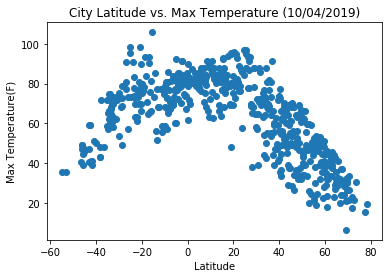

In [36]:
# To get x and y values
lat = df["Lat"]
max_temp = df["Max Temp"]

# Scatter plot
plt.scatter(lat,max_temp)

# Labeling
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title("City Latitude vs. Max Temperature (10/04/2019)")

# To save as png
plt.savefig("latvstemp.png")

# Display
plt.show()

#### Latitude vs. Humidity Plot

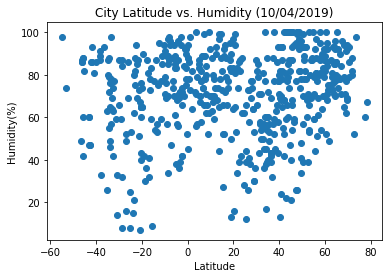

In [39]:
# To get x and y values
lat = df["Lat"]
hum = df["Humidity"]

# Scatter plot
plt.scatter(lat,hum)

# Labeling
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity (10/04/2019)")

# To save as png
plt.savefig("latvshumidity.png")

# Display
plt.show()

#### Latitude vs. Cloudiness Plot

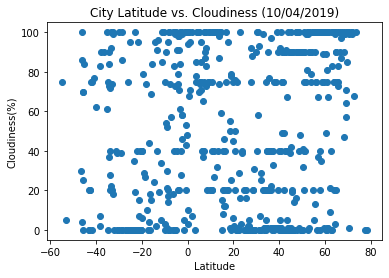

In [40]:
# To get x and y values
lat = df["Lat"]
cloudiness = df["Cloudiness"]

# Scatter plot
plt.scatter(lat,cloudiness)

# Labeling
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness (10/04/2019)")

# To save as png
plt.savefig("latvscloud.png")

# Display
plt.show()

#### Latitude vs. Wind Speed Plot

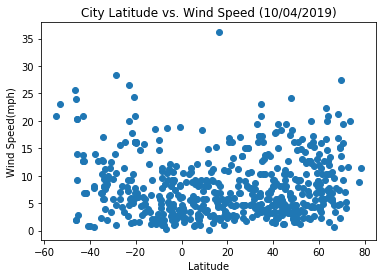

In [41]:
# To get x and y values
lat = df["Lat"]
ws = df["Wind Speed"]

# Scatter plot
plt.scatter(lat,ws)

# Labeling
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("City Latitude vs. Wind Speed (10/04/2019)")

# To save as png
plt.savefig("latvswindspeed.png")

# Display
plt.show()